<a href="https://colab.research.google.com/github/Karim-mansour/machine-learning/blob/master/handwritten.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot as plt
import numpy as np
import random
import cv2
import os 
from keras.preprocessing import image
from keras import backend as K
from keras.preprocessing.image import img_to_array, load_img


In [0]:
# Input image dimensions
img_rows, img_cols = 28, 28

# The number of training samples per batch. 128 is a reasonable number.
batch_size = 128

# Our data set contains 10 digits, so the number of classes is 10
num_classes = 10

# epochs is the number of times the model is trained with the data set, more can be better, up to a point
epochs = 20

# dropout is a common regularization hyperperameter. It helps to avoid overfitting or memorizing the input.
dropout = 0.5

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Save original test images for display purposes
orig_test = x_test

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
x_train, x_test = x_train / 255.0, x_test / 255.0

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(dropout/2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

Epoch 1/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2380 - accuracy: 0.9266 - val_loss: 0.0506 - val_accuracy: 0.9834
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0828 - accuracy: 0.9754 - val_loss: 0.0413 - val_accuracy: 0.9861
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0641 - accuracy: 0.9809 - val_loss: 0.0376 - val_accuracy: 0.9865
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0536 - accuracy: 0.9839 - val_loss: 0.0336 - val_accuracy: 0.9895
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0452 - accuracy: 0.9860 - val_loss: 0.0296 - val_accuracy: 0.9897
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0380 - accuracy: 0.9878 - val_loss: 0.0275 - val_accuracy: 0.9913
Epoch 7/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0344 - accuracy: 0.9889 - val_loss: 0.0325 - val_accuracy: 0.9900
Epoch 

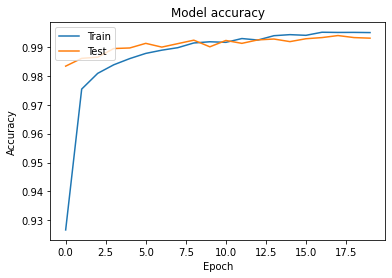

In [0]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train model for a given number of epochs
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

# Evaluate model against test data
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


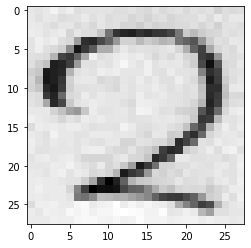

In [0]:
img4 = load_img('/realimage4.png',True,target_size=(img_rows,img_cols))

img1 = load_img('/realimage1.png',True,target_size=(img_rows,img_cols))
img3 = load_img('/realimage3.png',True,target_size=(img_rows,img_cols))
img2 = load_img('/realimage2.png',True,target_size=(img_rows,img_cols))
plt.imshow(img3, cmap='gray')

In [0]:
x4 = img_to_array(img4)
x4 = np.expand_dims(x4, axis=0)
x3 = img_to_array(img3)
x3 = np.expand_dims(x3, axis=0)
x2 = img_to_array(img2)
x2 = np.expand_dims(x2, axis=0)
x1 = img_to_array(img1)
x1 = np.expand_dims(x1, axis=0)



In [0]:
predictions = model.predict(x3)
most_likely = predictions.argmax(1)

In [0]:
print (most_likely)
print (predictions)

[2]
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
